## Assignment Week 4 - Biswajit Sharma

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

Load the data as a Pandas data frame and ensure that it imported correctly.

In [2]:
# read dataset
df = pd.read_csv("./datasets/auto-mpg.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Remove the car name column

In [4]:
# drop car name column
df = df.drop(columns=["car name"])

In [5]:
# view few rows to check car name column is dropped
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean

In [6]:
# check information of the dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


yes, we see that `horsepower` column has datatype object or string. This might be because the column may have non numeric value/s.

In [7]:
# Lets check if we have any non numeric data using isnumeric function
df[df["horsepower"].str.isnumeric() == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


We see theres are `non-numeric` string data in the `horsepower` column.

In [8]:
# replace non-numeric with NaN
df["horsepower"] = df["horsepower"].apply(lambda x: int(x) if x.isnumeric() else np.nan)

In [9]:
# replace Nan in horsepower column with  mean value
mean_horsepower = df["horsepower"].mean(skipna=True)
df["horsepower"] = df["horsepower"].fillna(mean_horsepower)

In [10]:
# check if horsepower column is converted to numeric datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


Create dummy variables for the origin column.

In [11]:
# using pandas get_dummies function to create dummy variables for origin column
df_with_dummies = pd.get_dummies(df, columns=["origin"], prefix="origin", dtype="int")

In [12]:
# view few rows after transformations
df_with_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

In [13]:
# create correlation matrix for numerical features
corr_df = df_with_dummies.corr()
corr_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,0.486083,-0.281258,-0.321325
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
origin_1,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
origin_2,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
origin_3,0.442174,-0.396479,-0.433505,-0.321325,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


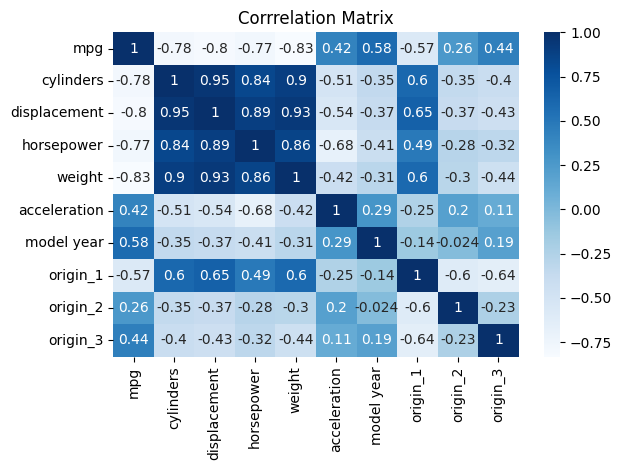

In [14]:
# create correlation matrix heatmap visualization
sns.heatmap(corr_df, annot=True, cmap="Blues")
plt.title("Fig 1. Corrrelation Matrix")
plt.tight_layout()
plt.show()

Yes, there are features highly correlated with `mpg`. Given below a list of such highly correlated featues (correlation coeeficient >= 0.8)
 - `displacement`
 - `weight`

Yes, there are features highly correlated with each other. Given below a list of such highly correlated featues (correlation coeeficient >= 0.9)
 - `cylinders` and `displacement`
 - `cylinders` and `weight`
 - `displacement` and `weight`

Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

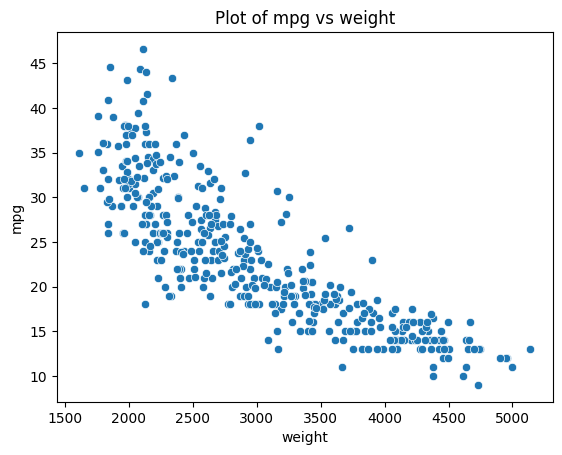

In [15]:
# create a plot of mpg vs weight
sns.scatterplot(data=df_with_dummies,x="weight",y="mpg")
plt.title("Fig 2. Plot of mpg vs weight")
plt.show()

The scatterplot shows **high negative correlation** between `mpg` and `weight`. This observation is consisent with the _correlation coefficient_ of $-0.83$ which we noticed in the above correlation matrix (Fig 1). Therefore, as weight increases mpg tends to decrease.

Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [16]:
# create features from the datafarme
#for linear regression it is also better to drop one of the dummy coded feature variables as to avoid linear dependence
features_columns = [cols for cols in df_with_dummies.columns if cols not in ["mpg","origin_3"]]
target_column = "mpg"

In [99]:
# using sklearn's train_test_split method to split the dataset
features_train, features_test, target_train, target_test = train_test_split(
    df_with_dummies[features_columns], df_with_dummies[target_column], test_size=0.2
)

Train an ordinary linear regression on the training data.

In [100]:
# displacement column has high correlation with weight and will cause linear dependence in the model
# hence, lets drop one of them, say displacement
features_train = features_train.drop(columns=["displacement","weight"])
features_test = features_test.drop(columns=["displacement", "weight"])

In [101]:
# create a standardscaler as linear regression coeeficients depends on scale of the features
stdscaler = StandardScaler()

In [102]:
#create linear regression object
linear_reg = LinearRegression()

In [103]:
# create  pipeline to perform scaling and model fit
pipe = Pipeline([('scaler', stdscaler), ('reg', linear_reg)])

In [104]:
#fit training data
pipe.fit(features_train, target_train)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', LinearRegression())])

In [105]:
predicted_target_test = pipe.predict(features_test)
predicted_target_train = pipe.predict(features_train)

In [106]:
## Learnin curve
def create_learning_curve(X,y):
    pipeline = make_pipeline(
        StandardScaler(),
        LinearRegression()
    )
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline,
        X,
        y,
        cv=5,
        scoring="neg_mean_squared_error",
        n_jobs=-1,
        train_sizes = np.linspace(0.01,1.0,50),
        random_state=1
    )

    mean_train_scores = np.mean(train_scores, axis=1) * -1
    mean_test_scores = np.mean(test_scores, axis=1) * -1
    print(f"mean_train_scores: {mean_train_scores}")
    print(f"mean_test_scores: {mean_test_scores}")

    plt.plot(train_sizes, mean_train_scores, "--", color="brown", label="Training RMSE")
    plt.plot(train_sizes, mean_test_scores, color="blue", label="Test RMSE")
    plt.yscale("log")
    plt.legend(loc="best")
    plt.show()

mean_train_scores: [1.68290326e-30 9.54546691e-01 8.11234803e-01 1.31487795e+00
 1.72411014e+00 2.36105421e+00 2.58644957e+00 2.67403476e+00
 4.14914876e+00 4.89384433e+00 4.85486892e+00 5.48165077e+00
 5.66122176e+00 5.77641249e+00 5.48596293e+00 5.31519930e+00
 5.36433674e+00 5.58423344e+00 5.82954123e+00 5.81288684e+00
 6.14288455e+00 6.34366550e+00 6.52771123e+00 6.61109019e+00
 6.64375316e+00 6.77180452e+00 8.56146745e+00 8.39389728e+00
 8.29193938e+00 8.15523298e+00 8.31619711e+00 8.36002341e+00
 8.24869817e+00 8.18742380e+00 8.71087035e+00 8.92060963e+00
 9.33440311e+00 9.36825499e+00 1.18015652e+01 1.28610347e+01
 1.30328975e+01 1.30807619e+01 1.29670305e+01 1.28203210e+01
 1.27473263e+01 1.28693800e+01 1.28458012e+01 1.29472177e+01
 1.32876741e+01 1.34944283e+01]
mean_test_scores: [186.15314612  83.26483251  46.56727275  34.39785059  30.85044832
 179.25920415 158.53386265 156.11271495  39.98493513  62.67439318
  44.81940907  77.42340241 116.03801736  90.58556591  78.95455249
 

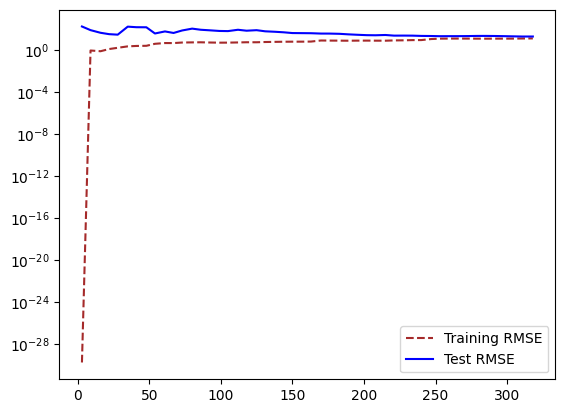

In [107]:
create_learning_curve(df_with_dummies[features_train.columns], df_with_dummies[target_column])

In [108]:
# R2 
print(f"Training R2: {r2_score(target_train, predicted_target_train)}")
print(f"Test R2: {r2_score(target_test, predicted_target_test)}")

Training R2: 0.7790091377554966
Test R2: 0.7321642304263194


In [109]:
# RMSE 
print(f"Training RMSE: {root_mean_squared_error(target_train, predicted_target_train)}")
print(f"Test RMSE: {root_mean_squared_error(target_test, predicted_target_test)}")

Training RMSE: 3.5515361244768933
Test RMSE: 4.488761180313894


In [110]:
# MAE 
print(f"Training MAE: {mean_absolute_error(target_train, predicted_target_train)}")
print(f"Test MAE: {mean_absolute_error(target_test, predicted_target_test)}")

Training MAE: 2.64671775895391
Test MAE: 3.5055449121816222


In [34]:
## polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [111]:
poly = PolynomialFeatures(
    degree = 2,
    include_bias=False,
    interaction_only=False
)

In [112]:
poly_train_features = poly.fit_transform(features_train)
poly_test_features = poly.fit_transform(features_test)
poly_features = poly.fit_transform(df_with_dummies[features_train.columns])

In [ ]:
# create_learning_curve(poly_features, df[target_column])

In [38]:
features_train.columns

Index(['cylinders', 'horsepower', 'acceleration', 'model year', 'origin_1',
       'origin_2'],
      dtype='object')

In [72]:
## few features as polynomial
poly_df = pd.DataFrame(data=poly.fit_transform(df[["cylinders", "acceleration", "model year"]]),
            columns=["cylinders", "acceleration", "model year", "cylinders2", "acceleration2", "model year2", "cylinders_int", "acceleration_int", "model year_int"])
# poly_df = pd.DataFrame(data=poly.fit_transform(df_with_dummies[["cylinders", "model year"]]),
#             columns=["cylinders", "model year", "cylinders2", 
#                      "model year2", "cylinders_int"])

In [73]:
poly_df.head()

,cylinders,acceleration,model year,cylinders2,acceleration2,model year2,cylinders_int,acceleration_int,model year_int
0,8.0,12.0,70.0,64.0,96.0,560.0,144.00,840.0,4900.0
1,8.0,11.5,70.0,64.0,92.0,560.0,132.25,805.0,4900.0
2,8.0,11.0,70.0,64.0,88.0,560.0,121.00,770.0,4900.0
3,8.0,12.0,70.0,64.0,96.0,560.0,144.00,840.0,4900.0
4,8.0,10.5,70.0,64.0,84.0,560.0,110.25,735.0,4900.0


In [74]:
poly_df_full = pd.concat([poly_df,df_with_dummies[["horsepower", "origin_1","origin_2"]]], axis=1)

In [75]:
poly_df_full.head()

,cylinders,acceleration,model year,cylinders2,acceleration2,model year2,cylinders_int,acceleration_int,model year_int,horsepower,origin_1,origin_2
0,8.0,12.0,70.0,64.0,96.0,560.0,144.00,840.0,4900.0,130.0,1,0
1,8.0,11.5,70.0,64.0,92.0,560.0,132.25,805.0,4900.0,165.0,1,0
2,8.0,11.0,70.0,64.0,88.0,560.0,121.00,770.0,4900.0,150.0,1,0
3,8.0,12.0,70.0,64.0,96.0,560.0,144.00,840.0,4900.0,150.0,1,0
4,8.0,10.5,70.0,64.0,84.0,560.0,110.25,735.0,4900.0,140.0,1,0


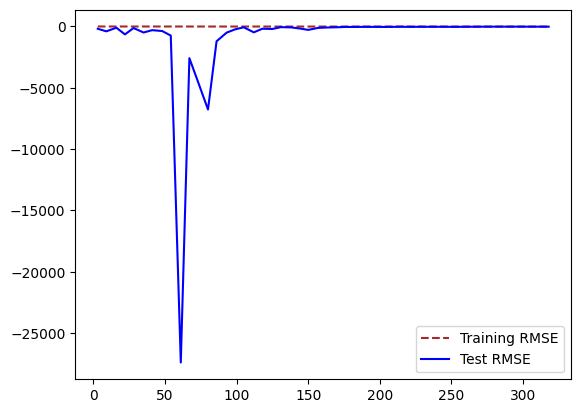

In [76]:
create_learning_curve(poly_df_full, df_with_dummies[target_column])

mean_train_scores: [8.41451632e-31 1.16866511e-01 2.64089211e-01 3.12993332e-01
 5.82037324e-01 5.15652476e-01 6.13250866e-01 7.29357810e-01
 1.06872350e+00 1.37711667e+00 1.44617313e+00 1.52687246e+00
 2.16540148e+00 2.43854938e+00 2.44915836e+00 2.43119398e+00
 2.58728855e+00 2.64524724e+00 2.78683982e+00 2.91582105e+00
 3.12186073e+00 3.06543567e+00 3.18654792e+00 3.23673020e+00
 3.31884256e+00 3.41146886e+00 3.84951684e+00 3.99380400e+00
 4.00410896e+00 3.92252679e+00 4.02155714e+00 4.03925253e+00
 4.09374015e+00 4.10295663e+00 4.31600062e+00 4.38683594e+00
 4.39691867e+00 4.45312552e+00 5.15599585e+00 6.05570748e+00
 6.57994633e+00 6.76693884e+00 6.81853114e+00 6.87061662e+00
 7.10067988e+00 7.35213302e+00 7.44464625e+00 7.50831588e+00
 7.81120611e+00 7.78335344e+00]
mean_test_scores: [1.00186615e+02 2.33626431e+04 1.62830581e+03 3.03929903e+04
 2.64421423e+02 8.32833878e+04 4.21714030e+03 1.98654473e+03
 4.82365255e+02 9.27236467e+02 1.42130940e+03 1.16080389e+03
 5.77464574e+02 

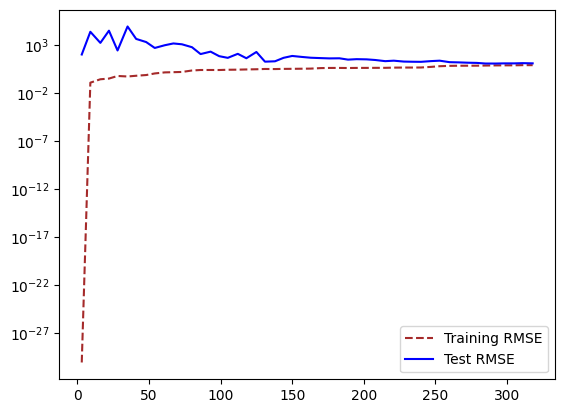

In [113]:
create_learning_curve(poly_features, df_with_dummies[target_column])

In [114]:
pipe.fit(poly_train_features, target_train)
poly_target_test = pipe.predict(poly_test_features)
poly_target_train = pipe.predict(poly_train_features)

In [115]:
# R2 
print(f"Training R2: {r2_score(target_train, poly_target_train)}")
print(f"Test R2: {r2_score(target_test, poly_target_test)}")

Training R2: 0.8773465030456566
Test R2: 0.8248817731721373


In [116]:
# RMSE 
print(f"Training RMSE: {root_mean_squared_error(target_train, poly_target_train)}")
print(f"Test RMSE: {root_mean_squared_error(target_test, poly_target_test)}")

Training RMSE: 2.6458733115522586
Test RMSE: 3.6295926518411488


#### Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [62]:
from sklearn.linear_model import Ridge

In [117]:
ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridgereg", Ridge())
    ])

In [118]:
ridge_pipe.fit(features_train, target_train)

Pipeline(steps=[('scaler', StandardScaler()), ('ridgereg', Ridge())])

In [119]:
ridge_train_predicted = ridge_pipe.predict(features_train)
ridge_test_predicted = ridge_pipe.predict(features_test)

In [120]:
# R2 
print(f"Training R2: {r2_score(target_train, ridge_train_predicted)}")
print(f"Test R2: {r2_score(target_test, ridge_test_predicted)}")

Training R2: 0.7790002445651742
Test R2: 0.7324769245409997


In [121]:
# RMSE 
print(f"Training RMSE: {root_mean_squared_error(target_train, ridge_train_predicted)}")
print(f"Test RMSE: {root_mean_squared_error(target_test, ridge_test_predicted)}")

Training RMSE: 3.551607584827378
Test RMSE: 4.4861401354888395


In [ ]:
# create Cross Validation to evaluate model performance
kf = KFold(n_splits=5, shuffle=True, random_state = 1)

In [ ]:
#create pipeline to perform scaling and then fit Linear Regression
pipeline = make_pipeline(
    stdscaler,
    LinearRegression()
)

In [ ]:
cv_results = cross_val_score(
    pipeline,
    features_train,
    target_train,
    cv=kf,
    scoring="r2",
    n_jobs=-1
)

In [ ]:
# check the results of the K-fold CV
cv_results